# Project to Sales Analysis of AAL Company

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import os

In [5]:
#load Dataset
df = pd.read_csv('1716984926_ausapparalsales4thqrt2020/AusApparalSales4thQrt2020.csv')

In [6]:
# Print few head rows from dataset
print(df.head())


         Date        Time State     Group  Unit  Sales
0  1-Oct-2020     Morning    WA      Kids     8  20000
1  1-Oct-2020     Morning    WA       Men     8  20000
2  1-Oct-2020     Morning    WA     Women     4  10000
3  1-Oct-2020     Morning    WA   Seniors    15  37500
4  1-Oct-2020   Afternoon    WA      Kids     3   7500


In [7]:

# Print last few rows from dataset
print(df.tail())


             Date        Time State     Group  Unit  Sales
7555  30-Dec-2020   Afternoon   TAS   Seniors    14  35000
7556  30-Dec-2020     Evening   TAS      Kids    15  37500
7557  30-Dec-2020     Evening   TAS       Men    15  37500
7558  30-Dec-2020     Evening   TAS     Women    11  27500
7559  30-Dec-2020     Evening   TAS   Seniors    13  32500


In [8]:

# Providing information about the DataFrame, including data types and non-null counts
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB
None


In [9]:
# Displaying descriptive statistics of the DataFrame, such as mean, std, min, max, and so on.
print(df.describe())



              Unit          Sales
count  7560.000000    7560.000000
mean     18.005423   45013.558201
std      12.901403   32253.506944
min       2.000000    5000.000000
25%       8.000000   20000.000000
50%      14.000000   35000.000000
75%      26.000000   65000.000000
max      65.000000  162500.000000


In [10]:
# Displaying datatypes of the columns
df.dtypes


Date     object
Time     object
State    object
Group    object
Unit      int64
Sales     int64
dtype: object

## Data wrangling

In [11]:
# Checking for missing values
missing_values = df.isnull().sum()
print("Missing Values per Column:")
print(missing_values)

Missing Values per Column:
Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64


In [12]:
# Checking for naN values
missing_values = df.notna().sum()
print("Missing Values per Column:")
print(missing_values)

Missing Values per Column:
Date     7560
Time     7560
State    7560
Group    7560
Unit     7560
Sales    7560
dtype: int64


In [13]:
# Handling missing values
df = df.fillna(df["Sales"].mean())


In [14]:
# Removing duplicate records
df = df.drop_duplicates()

In [15]:
# Cleaning data by standardizing formats
df['Date'] = pd.to_datetime(df['Date'])
# Displaying the DataFrame after cleaning
print("DataFrame after cleaning data by standardizing formats:")
print(df)

DataFrame after cleaning data by standardizing formats:
           Date        Time State     Group  Unit  Sales
0    2020-10-01     Morning    WA      Kids     8  20000
1    2020-10-01     Morning    WA       Men     8  20000
2    2020-10-01     Morning    WA     Women     4  10000
3    2020-10-01     Morning    WA   Seniors    15  37500
4    2020-10-01   Afternoon    WA      Kids     3   7500
...         ...         ...   ...       ...   ...    ...
7555 2020-12-30   Afternoon   TAS   Seniors    14  35000
7556 2020-12-30     Evening   TAS      Kids    15  37500
7557 2020-12-30     Evening   TAS       Men    15  37500
7558 2020-12-30     Evening   TAS     Women    11  27500
7559 2020-12-30     Evening   TAS   Seniors    13  32500

[7560 rows x 6 columns]


# Data Transformation

In [16]:
df['Sales_Normalized'] = (df['Sales'] - df['Sales'].min()) / (df['Sales'].max() - df['Sales'].min())
df

,Date,Time,State,Group,Unit,Sales,Sales_Normalized
0,2020-10-01,Morning,WA,Kids,8,20000,0.095238
1,2020-10-01,Morning,WA,Men,8,20000,0.095238
2,2020-10-01,Morning,WA,Women,4,10000,0.031746
3,2020-10-01,Morning,WA,Seniors,15,37500,0.206349
4,2020-10-01,Afternoon,WA,Kids,3,7500,0.015873
...,...,...,...,...,...,...,...
7555,2020-12-30,Afternoon,TAS,Seniors,14,35000,0.190476
7556,2020-12-30,Evening,TAS,Kids,15,37500,0.206349
7557,2020-12-30,Evening,TAS,Men,15,37500,0.206349
7558,2020-12-30,Evening,TAS,Women,11,27500,0.142857


# Grouping Operation

In [17]:
# Average sales for each combination of State and Group.
df_grouped = df.groupby(['State', 'Group'])['Sales'].mean().reset_index()
print(df_grouped)

   State     Group         Sales
0    NSW      Kids  68842.592593
1    NSW       Men  70453.703704
2    NSW   Seniors  67361.111111
3    NSW     Women  71009.259259
4     NT      Kids  21111.111111
5     NT       Men  21342.592593
6     NT   Seniors  20240.740741
7     NT     Women  20935.185185
8    QLD      Kids  31518.518519
9    QLD       Men  31083.333333
10   QLD   Seniors  30333.333333
11   QLD     Women  30833.333333
12    SA      Kids  53759.259259
13    SA       Men  54277.777778
14    SA   Seniors  54509.259259
15    SA     Women  55444.444444
16   TAS      Kids  21388.888889
17   TAS       Men  21324.074074
18   TAS   Seniors  20925.925926
19   TAS     Women  20657.407407
20   VIC      Kids  97629.629630
21   VIC       Men  97805.555556
22   VIC   Seniors  97462.962963
23   VIC     Women  98083.333333
24    WA      Kids  20833.333333
25    WA       Men  21305.555556
26    WA   Seniors  20416.666667
27    WA     Women  19490.740741


## Identify States with Highest Revenues

In [18]:

# Group by state and sum the sales
df_state_sales = df.groupby('State')['Sales'].sum().reset_index()

# Sort states by total sales in descending order
df_state_sales_sorted = df_state_sales.sort_values(by='Sales', ascending=False)
print(df_state_sales_sorted)

  State      Sales
5   VIC  105565000
0   NSW   74970000
3    SA   58857500
2   QLD   33417500
4   TAS   22760000
1    NT   22580000
6    WA   22152500


## Identify States with Lowest Revenue

In [19]:
# Sort states by total sales in descending order
df_state_sales_sorted = df_state_sales.sort_values(by='Sales', ascending=True)
print(df_state_sales_sorted)

  State      Sales
6    WA   22152500
1    NT   22580000
4   TAS   22760000
2   QLD   33417500
3    SA   58857500
0   NSW   74970000
5   VIC  105565000


In [20]:
print("State with Highest Revenues: \n", df_state_sales_sorted.tail(1))
print("State with Lowest Revenues: \n", df_state_sales_sorted.head(1))

State with Highest Revenues: 
   State      Sales
5   VIC  105565000
State with Lowest Revenues: 
   State     Sales
6    WA  22152500


# Data analysis


In [21]:
sales_state = df[['Sales', 'Unit']].describe()
sales_state

,Sales,Unit
count,7560.000000,7560.000000
mean,45013.558201,18.005423
std,32253.506944,12.901403
min,5000.000000,2.000000
25%,20000.000000,8.000000
50%,35000.000000,14.000000
75%,65000.000000,26.000000
max,162500.000000,65.000000


In [22]:
# Calculate additional statistics
sales_mean = df['Sales'].mean()
sales_median = df['Sales'].median()
sales_mode = df['Sales'].mode()[0]
sales_std = df['Sales'].std()

unit_mean = df['Unit'].mean()
unit_median = df['Unit'].median()
unit_mode = df['Unit'].mode()[0]
unit_std = df['Unit'].std()


In [23]:
print("Sales Descriptive Stats:")
print(sales_state)

Sales Descriptive Stats:
               Sales         Unit
count    7560.000000  7560.000000
mean    45013.558201    18.005423
std     32253.506944    12.901403
min      5000.000000     2.000000
25%     20000.000000     8.000000
50%     35000.000000    14.000000
75%     65000.000000    26.000000
max    162500.000000    65.000000


In [24]:
print(f"\nSales Mean: {sales_mean}")
print(f"Sales Median: {sales_median}")
print(f"Sales Mode: {sales_mode}")
print(f"Sales Standard Deviation: {sales_std}")


Sales Mean: 45013.5582010582
Sales Median: 35000.0
Sales Mode: 22500
Sales Standard Deviation: 32253.506943966073


In [25]:

print(f"\nUnit Mean: {unit_mean}")
print(f"Unit Median: {unit_median}")
print(f"Unit Mode: {unit_mode}")
print(f"Unit Standard Deviation: {unit_std}")


Unit Mean: 18.00542328042328
Unit Median: 14.0
Unit Mode: 9
Unit Standard Deviation: 12.90140277758643


<Axes: >

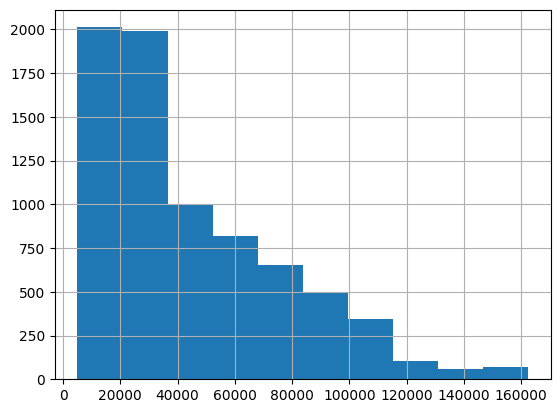

In [26]:
df['Sales'].hist()

## Identify the Group with the Highest and Lowest Sales

In [27]:
sales_by_group = df.groupby('Group')['Sales'].sum().reset_index()
sales_by_group

,Group,Sales
0,Kids,85072500
1,Men,85750000
2,Seniors,84037500
3,Women,85442500


In [28]:
highest_sales = sales_by_group.sort_values('Sales', ascending=False).iloc[0]
lowest_sales = sales_by_group.sort_values('Sales', ascending=True).iloc[0]

In [29]:
print("Group with Highest Sales:")
print(highest_sales)
print("\nGroup with Lowest Sales:")
print(lowest_sales)

Group with Highest Sales:
Group         Men
Sales    85750000
Name: 1, dtype: object

Group with Lowest Sales:
Group     Seniors
Sales    84037500
Name: 2, dtype: object


## Identify the Group with the Highest and Lowest Sales (Based on Units)

In [30]:
sales_by_group = df.groupby('Group')['Unit'].sum().reset_index()
highest_unit_sales = sales_by_group.sort_values('Unit', ascending=False).iloc[0]
lowest_unit_sales = sales_by_group.sort_values('Unit', ascending=True).iloc[0]

In [31]:
print("Group with Highest Sales (based on units):")
print(highest_unit_sales)
print("\nGroup with Lowest Sale (based om units):")
print(lowest_unit_sales)

Group with Highest Sales (based on units):
Group      Men
Unit     34300
Name: 1, dtype: object

Group with Lowest Sale (based om units):
Group     Seniors
Unit        33615
Name: 2, dtype: object


##  Generate Weekly, Monthly, and Quarterly Reports

In [32]:
df = df.reset_index()
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Generate weekly reports
weekly_report = df.resample('W').agg({'Sales': 'sum', 'Unit': 'sum'}).reset_index()

# Generate monthly reports
monthly_report = df.resample('ME').agg({'Sales': 'sum', 'Unit': 'sum'}).reset_index()

# Generate Quaterly reports
quarterly_report = df.resample('QE').agg({'Sales': 'sum', 'Unit': 'sum'}).reset_index()

In [33]:
# Print or save reports
print("Weekly Report:")
print(weekly_report.head())

print("\nMonthly Report:")
print(monthly_report.head())

print("\nQuarterly Report:")
print(quarterly_report.head())

Weekly Report:
        Date     Sales   Unit
0 2020-10-04  15045000   6018
1 2020-10-11  27002500  10801
2 2020-10-18  26640000  10656
3 2020-10-25  26815000  10726
4 2020-11-01  21807500   8723

Monthly Report:
        Date      Sales   Unit
0 2020-10-31  114290000  45716
1 2020-11-30   90682500  36273
2 2020-12-31  135330000  54132

Quarterly Report:
        Date      Sales    Unit
0 2020-12-31  340302500  136121


# Data Visualization

In [34]:
!pip install seaborn

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

<Figure size 1400x800 with 0 Axes>

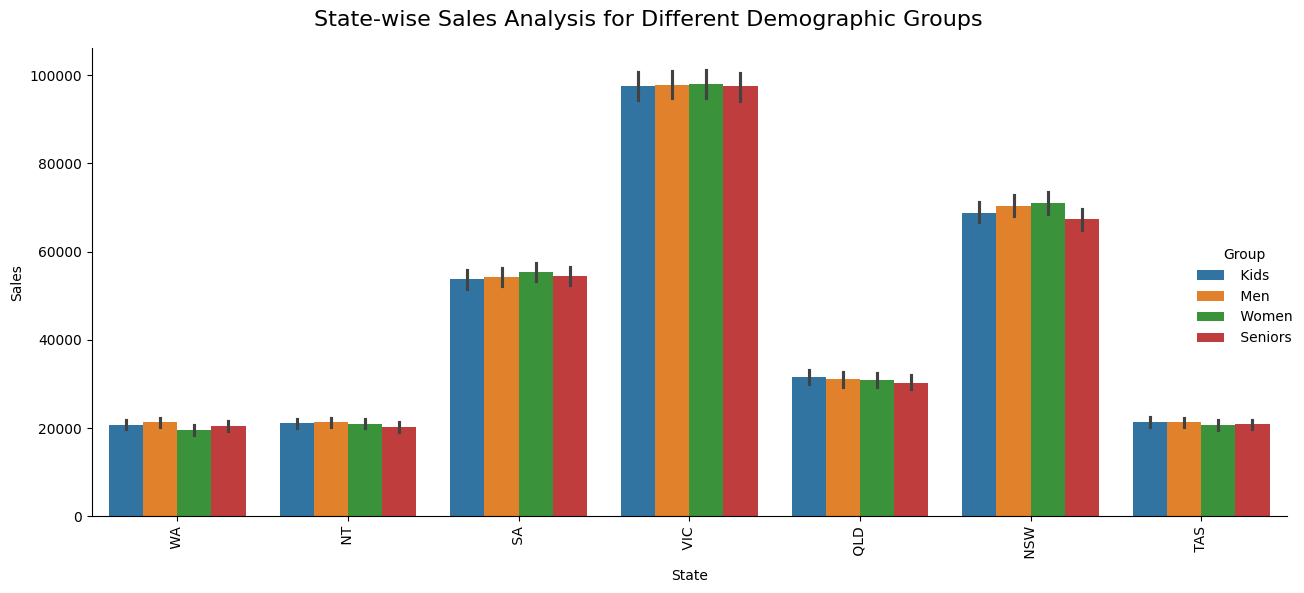

In [36]:

# Assuming 'df' contains a 'State', 'Group', and 'Sales' column
plt.figure(figsize=(14, 8))
g = sns.catplot(x='State', y='Sales', hue='Group', kind='bar', data=df, height=6, aspect=2)
g.set_xticklabels(rotation=90)
g.set_axis_labels("State", "Sales")

# Correct way to set the title for FacetGrid
g.fig.suptitle("State-wise Sales Analysis for Different Demographic Groups", fontsize=16)

plt.tight_layout()
plt.show()

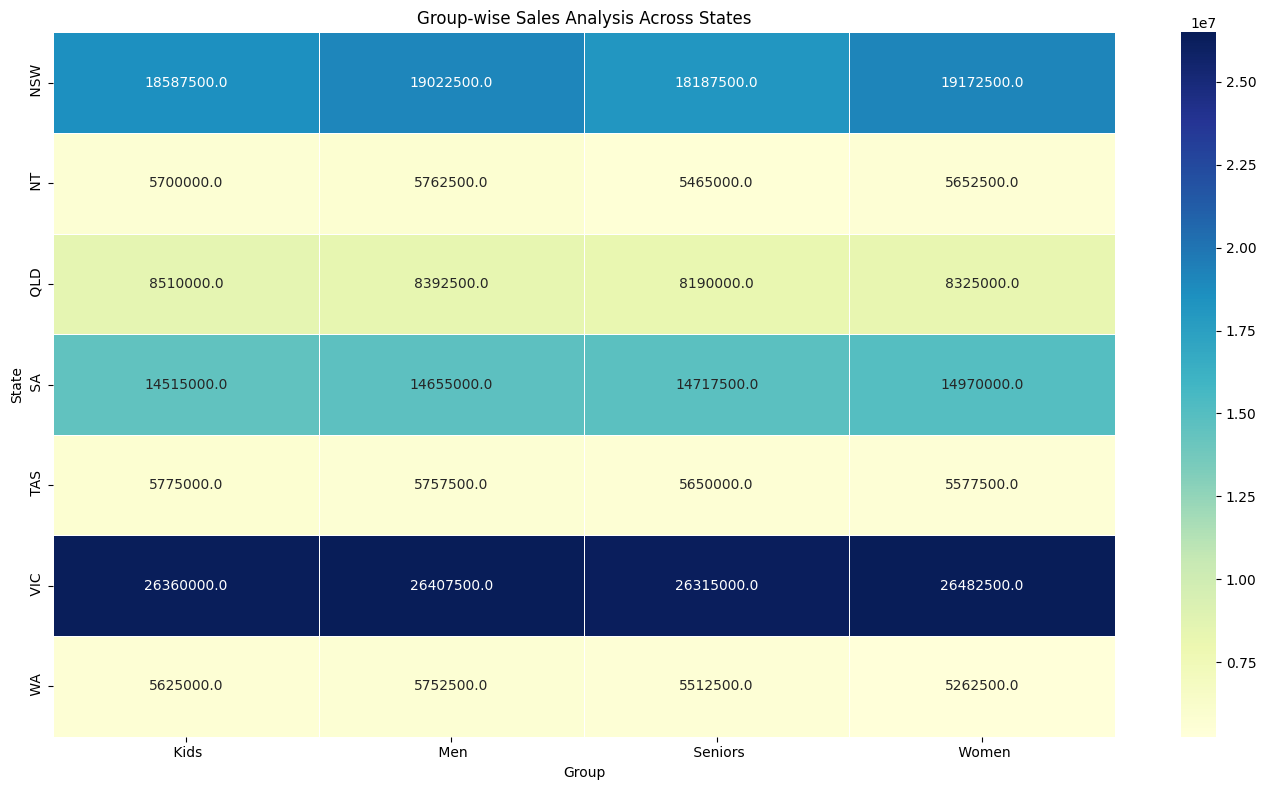

In [37]:
# Pivot the data for a heatmap
group_state_sales = df.pivot_table(values='Sales', index='State', columns='Group', aggfunc='sum')

plt.figure(figsize=(14, 8))
sns.heatmap(group_state_sales, annot=True, cmap="YlGnBu", fmt=".1f", linewidths=.5)
plt.title('Group-wise Sales Analysis Across States')
plt.ylabel('State')
plt.xlabel('Group')
plt.tight_layout()
plt.show()

/tmp/ipykernel_11272/3660834677.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Time', y='Sales', data=time_of_day_sales, palette='viridis')


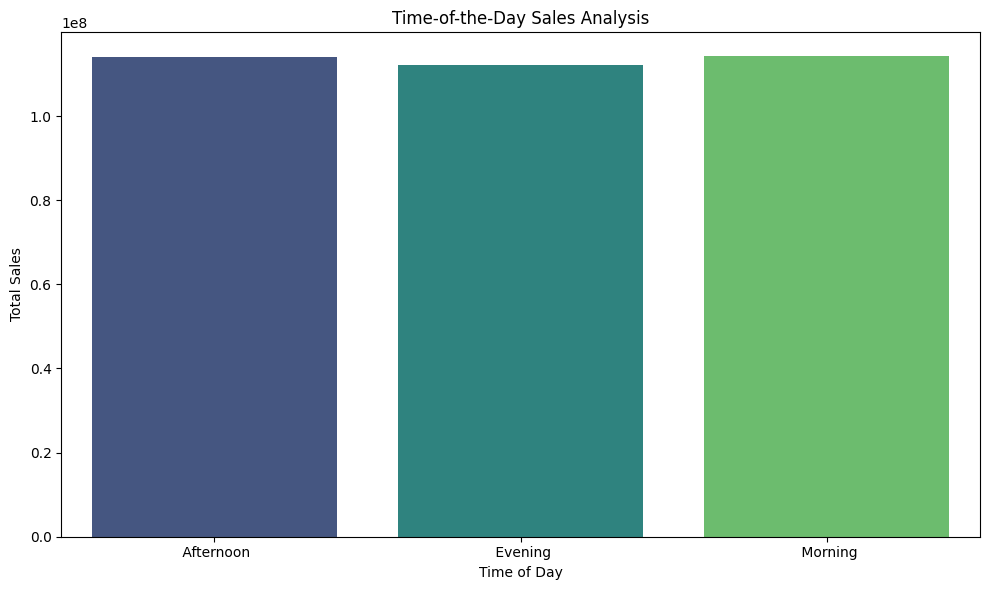

In [38]:
# Assuming 'Time' is the column indicating morning/afternoon/evening
time_of_day_sales = df.groupby('Time')['Sales'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Time', y='Sales', data=time_of_day_sales, palette='viridis')
plt.title('Time-of-the-Day Sales Analysis')
plt.xlabel('Time of Day')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

/tmp/ipykernel_11272/469675927.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M').agg({'Sales': 'sum'}).reset_index()
/tmp/ipykernel_11272/469675927.py:12: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_sales = df.resample('Q').agg({'Sales': 'sum'}).reset_index()


Daily Sales Report:
              Sales
Date               
2020-10-01  3720000
2020-10-02  3715000
2020-10-03  3890000
2020-10-04  3720000
2020-10-05  3862500
Weekly Sales Report:
        Date     Sales
0 2020-10-04  15045000
1 2020-10-11  27002500
2 2020-10-18  26640000
3 2020-10-25  26815000
4 2020-11-01  21807500

Monthly Sales Report:
        Date      Sales
0 2020-10-31  114290000
1 2020-11-30   90682500
2 2020-12-31  135330000

Quarterly Sales Report:
        Date      Sales
0 2020-12-31  340302500


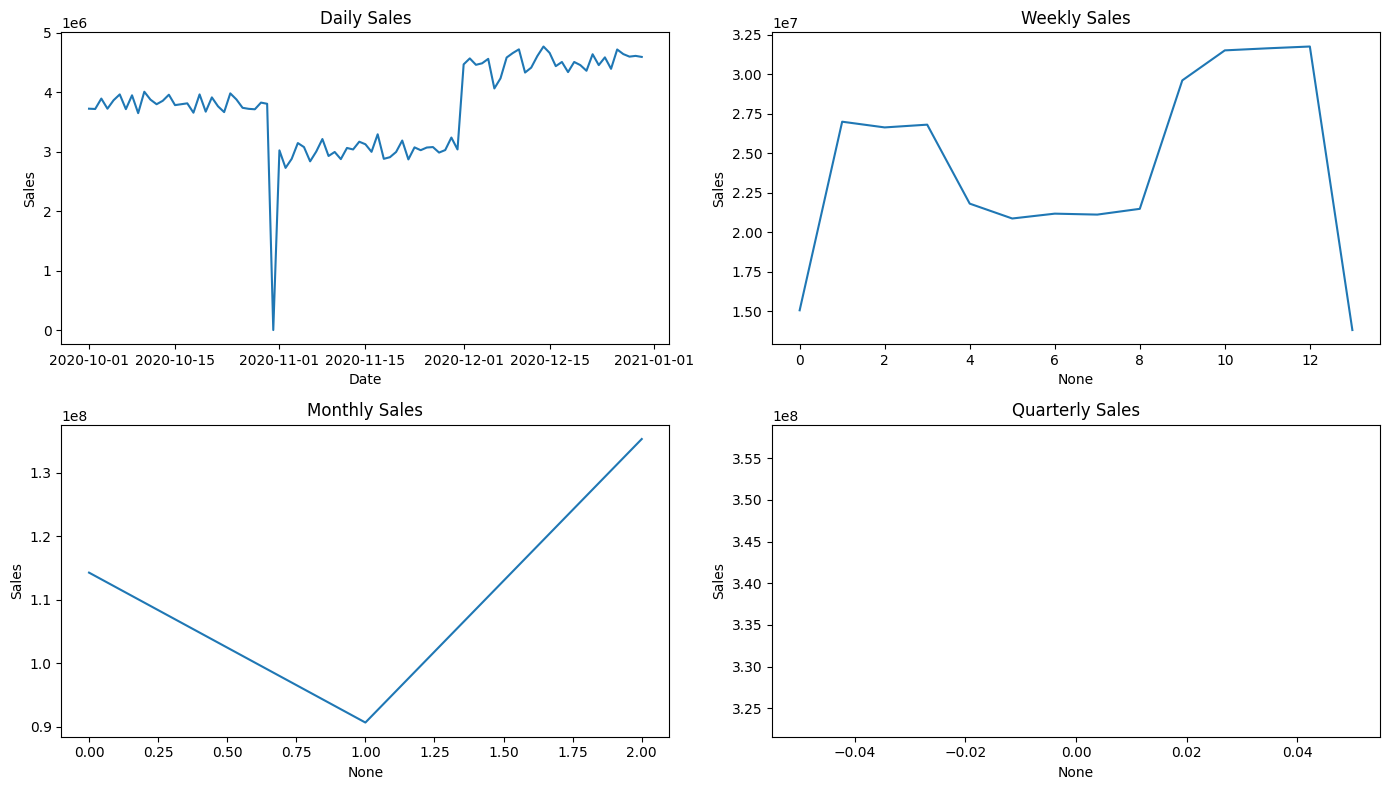

In [39]:
# Ensure the 'Date' column is in datetime format
df = df.reset_index()
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index for resampling
df.set_index('Date', inplace=True)

# Resample for daily, weekly, monthly, and quarterly data
daily_sales = df.resample('D').agg({'Sales': 'sum'})
weekly_sales = df.resample('W').agg({'Sales': 'sum'}).reset_index()
monthly_sales = df.resample('M').agg({'Sales': 'sum'}).reset_index()
quarterly_sales = df.resample('Q').agg({'Sales': 'sum'}).reset_index()

# Display the first few rows of each report
print("Daily Sales Report:")
print(daily_sales.head())

print("Weekly Sales Report:")
print(weekly_sales.head())

print("\nMonthly Sales Report:")
print(monthly_sales.head())

print("\nQuarterly Sales Report:")
print(quarterly_sales.head())

# Plotting the sales trends for each time period
plt.figure(figsize=(14, 8))

# Daily sales plot
plt.subplot(2, 2, 1)
sns.lineplot(data=daily_sales, x=daily_sales.index, y='Sales')
plt.title('Daily Sales')

# Weekly sales plot
plt.subplot(2, 2, 2)
sns.lineplot(data=weekly_sales, x=weekly_sales.index, y='Sales')
plt.title('Weekly Sales')

# Monthly sales plot
plt.subplot(2, 2, 3)
sns.lineplot(data=monthly_sales, x=monthly_sales.index, y='Sales')
plt.title('Monthly Sales')

# Quarterly sales plot
plt.subplot(2, 2, 4)
sns.lineplot(data=quarterly_sales, x=quarterly_sales.index, y='Sales')
plt.title('Quarterly Sales')

plt.tight_layout()
plt.show()

## **Recommendations**

## **1 States with the Highest and Lowest Revenues**
* Based on the state-wise sales analysis:

    * States with Highest Revenues: These states should continue with their current strategies and potentially expand their presence further, especially focusing on high-performing groups (e.g., Women, Men).

    * States with Lowest Revenues: Target these states for special marketing campaigns, promotions, and discounts to increase sales. Consider offering special deals tailored to local preferences to boost engagement.

## **2 Group Analysis Recommendations**
* The Group with the Highest Sales (e.g., Men, Women) should see increased focus, with personalized offerings and exclusive product launches.
    
* The Group with the Lowest Sales (e.g., Seniors, Kids) requires focused attention through tailored products, discounts, and targeted advertising.

## **3 Time-of-the-Day Sales Recommendations**
* Peak Sales Periods: Leverage the peak sales periods (e.g., evening hours) for flash sales, real-time offers, or even next-best offers to enhance customer engagement.
* Off-Peak Periods: For off-peak hours, consider offering discounted flash sales to drive traffic during quieter times.

## **4 General Recommendations**
* Expansion Strategy: For states with lower sales, consider further market research to understand local preferences, and deploy targeted marketing strategies.
* Diversification: The company should look into expanding its product lines or introducing seasonal collections to maintain high engagement across all demographics.